DS12 python で iris データを混合ガウスモデルでクラスタリング

In [1]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [2]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

<Figure size 1080x468 with 0 Axes>

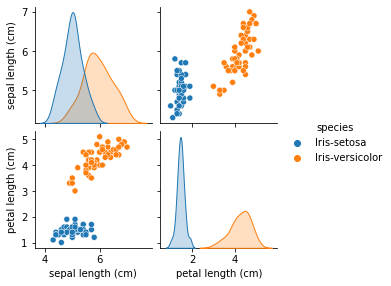

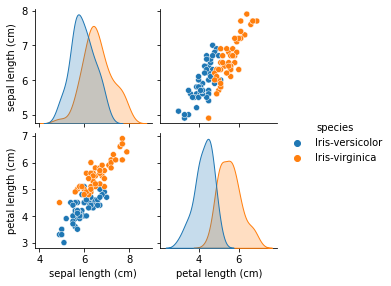

In [7]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal length (cm)', 'petal length (cm)', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal length (cm)', 'petal length (cm)']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal length (cm)', 'petal length (cm)']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [4]:
from sklearn.mixture import GaussianMixture
# 混合ガウスモデルでクラスタリングを実行
clf_1 = GaussianMixture(n_components=2, covariance_type='full')
clf_1.fit(iris_data_1)
clf_2 = GaussianMixture(n_components=2, covariance_type='full')
clf_2.fit(iris_data_2)

# 散布図表示のコードは notebook で配布

GaussianMixture(n_components=2)

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


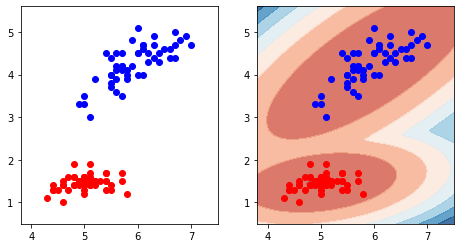

In [5]:
# 散布図表示のコード (1)
x = np.linspace(iris_data_1['sepal length (cm)'].min() - 0.5, iris_data_1['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_1['petal length (cm)'].min() - 0.5, iris_data_1['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf_1.score_samples(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


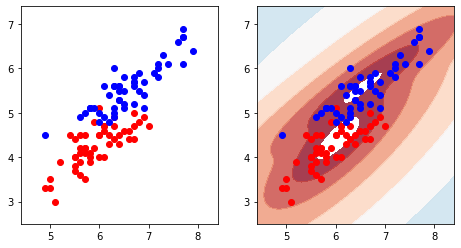

In [6]:
# 散布図表示のコード (2)
x = np.linspace(iris_data_2['sepal length (cm)'].min() - 0.5, iris_data_2['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_2['petal length (cm)'].min() - 0.5, iris_data_2['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf_2.score_samples(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
CS = ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8, 
                norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()